<a href="https://colab.research.google.com/github/DimpySingh001/House_price_production/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
import numpy as np
import pandas as pd


#Set random seed for reproducibility
np.random.seed(35)

#Generate synthetic data(1000 samples)
size = np.random.randint(500, 5000, 1000) #house size in sq.ft
bedrooms = np.random.randint(1, 6, 1000) #number of bedrooms
# Corrected line: generate 1000 random integers between 1 and 10 (inclusive)
locations = np.random.randint(1, 11, 1000) #Location score(1-10)
age = np.random.randint(1,51,1000)   #Age of House in year



#generate synthetic data(1000 samples)
price=(size*300)+(bedrooms*50000)+(locations*20000)-(age*2000)+np.random.randint(-20000,20000,1000)

#create data grame
df=pd.DataFrame({"Size":size,"Bedrooms":bedrooms,"Locations":locations,"Age":age,"Price":price})

#save to CSV
csv_filename="house_price_data.csv"
df.to_csv(csv_filename,index=False)

print(f"Dataset saved as '{csv_filename}' with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset saved as 'house_price_data.csv' with 1000 rows and 5 columns.


In [ ]:
import pandas as pd

#Load dataset(make sure to update the path if needed)
df=pd.read_csv("house_price_data.csv")

#Display first 5 rows
print(df.head())


   Size  Bedrooms  Locations  Age    Price
0  1795         4          4   49   719514
1  1451         3          5   22   631489
2  3507         4          3   26  1265417
3  3821         2          9    1  1440722
4  3292         2         10    3  1295186


In [ ]:
#check for missing values
print("\nMissing values:\n", df.isnull().sum())

#summary statictics
print("\nDataset Summary:\n",df.describe())


Missing values:
 Size         0
Bedrooms     0
Locations    0
Age          0
Price        0
dtype: int64

Dataset Summary:
               Size     Bedrooms    Locations          Age         Price
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean   2778.046000     3.016000     5.541000    25.148000  1.045024e+06
std    1295.237554     1.438685     2.884552    14.392333  3.985014e+05
min     501.000000     1.000000     1.000000     1.000000  2.127000e+05
25%    1724.000000     2.000000     3.000000    13.000000  7.248708e+05
50%    2727.500000     3.000000     5.000000    25.000000  1.047374e+06
75%    3916.250000     4.000000     8.000000    38.000000  1.363886e+06
max    4998.000000     5.000000    10.000000    50.000000  1.889484e+06


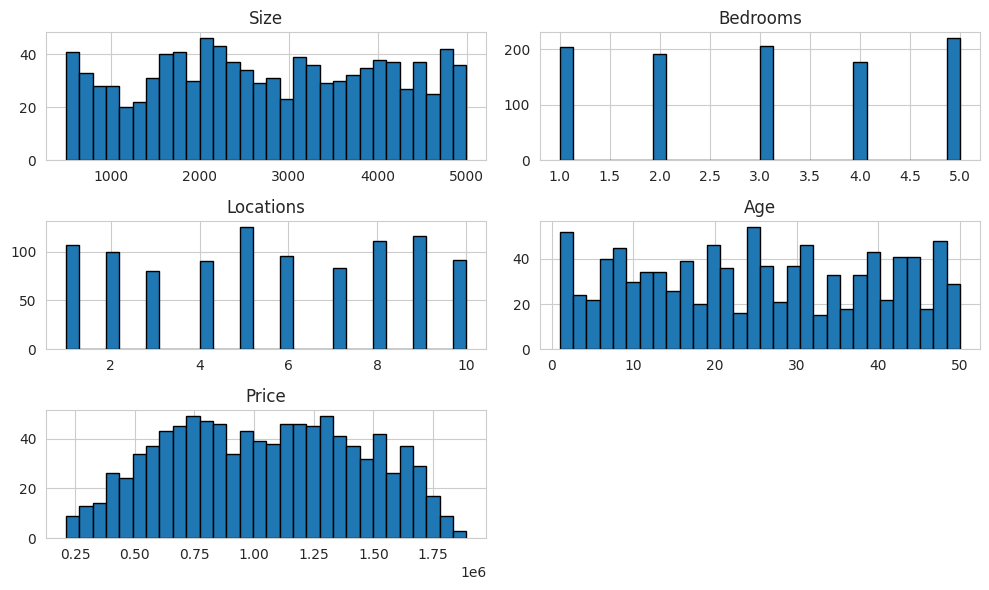

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#set plot style
sns.set_style("whitegrid")

#plot feature distributions
df.hist(figsize=(10, 6), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

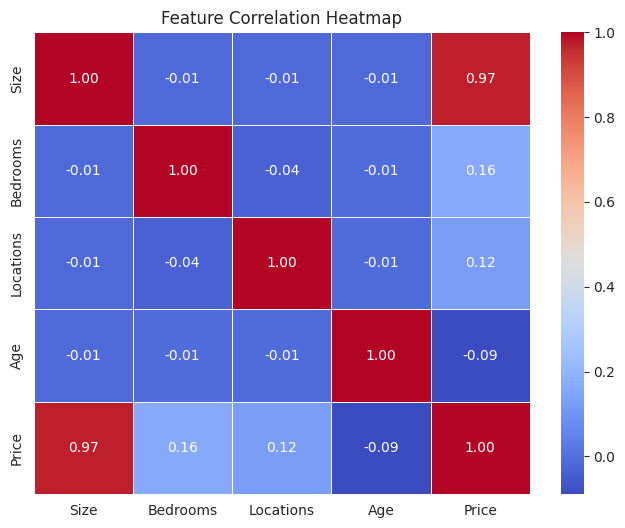

In [ ]:
# correlation heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#select features & target
x = df[["Size", "Bedrooms", "Locations", "Age"]]
y=df["Price"]

#split data inro training & testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#train linear regression model
model=LinearRegression()
model.fit(x_train,y_train)

#predictions
y_pred=model.predict(x_test)

#model performance
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"\nModel Performance:\nMAE:{mae:.2f},R2 Score:{r2:.2f}")


Model Performance:
MAE:10062.82,R2 Score:1.00


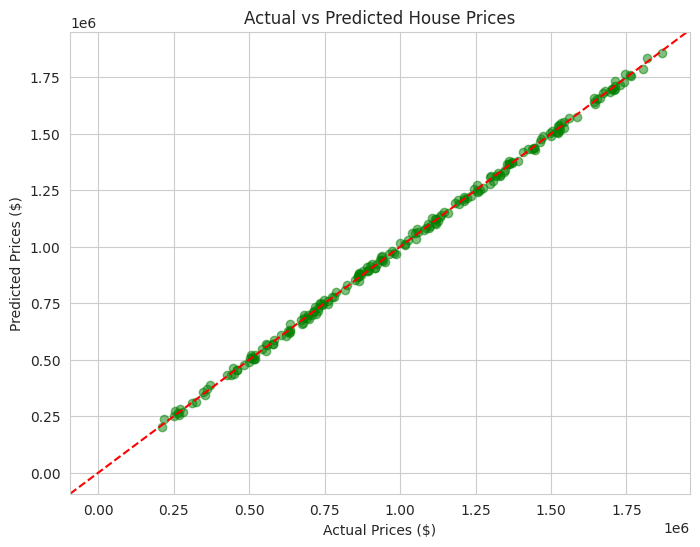

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5,color="green")
plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.title("Actual vs Predicted House Prices")
plt.axline([0,0],slope=1, color="red", linestyle="--")  #Ideal fit line
plt.show()
